In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd

In [2]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/twitter-geo-simulation') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"])
result_user = pd.read_json(data["result_user"])

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


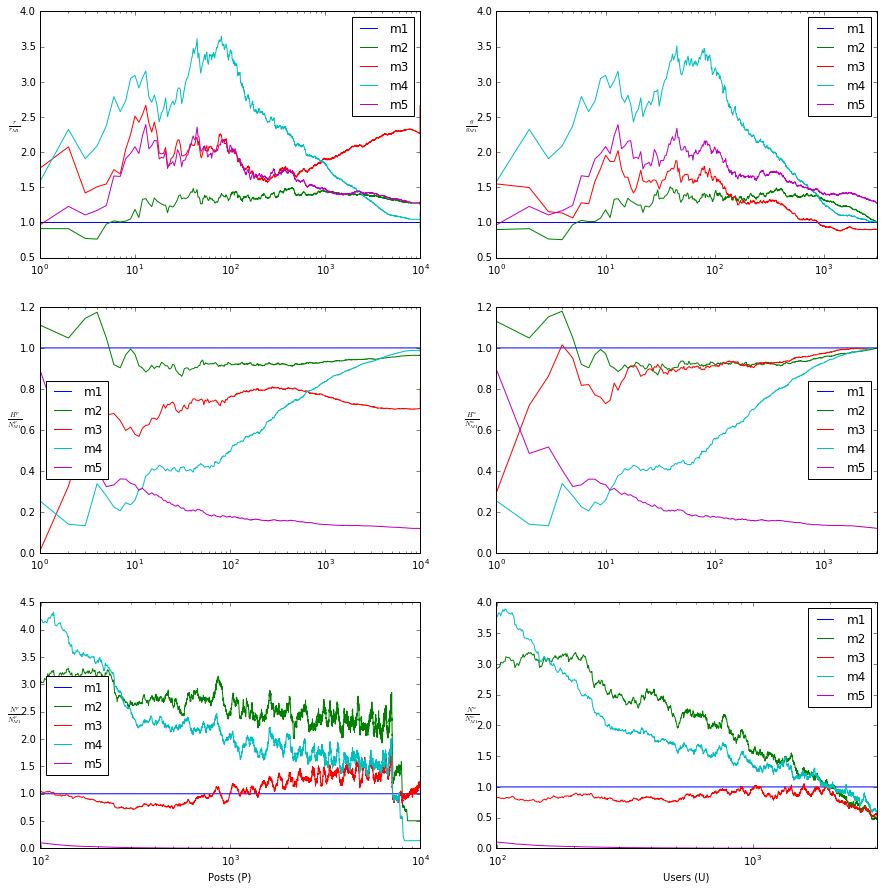

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
usagedominance = usagedominance.apply(rowRatio,1)

plts = usagedominance.plot(ax=axes[0,0], logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","usagedominance"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
userusagedominance = userusagedominance.apply(rowRatio,1)

plts = userusagedominance.plot(ax=axes[0,1], logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usagedominance"]]
usageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
usageEntorpy = usageEntorpy.apply(rowRatio,1)

plts = usageEntorpy.plot(ax=axes[1,0], logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","usagedominance"]]
userUsageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plts = userUsageEntorpy.plot(ax=axes[1,1], logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","usagedominance"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm2'] = ActivateionExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm3'] = ActivateionExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm4'] = ActivateionExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm5'] = ActivateionExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
ActivateionExposure = ActivateionExposure.apply(rowRatio,1)

plts = ActivateionExposure.plot(ax=axes[2,0], logx = True)
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","usagedominance"]]
UserExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm2'] = UserExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm3'] = UserExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm4'] = UserExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm5'] = UserExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
UserExposure = UserExposure.apply(rowRatio,1)

plts = UserExposure.plot(ax=axes[2,1], logx = True)
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

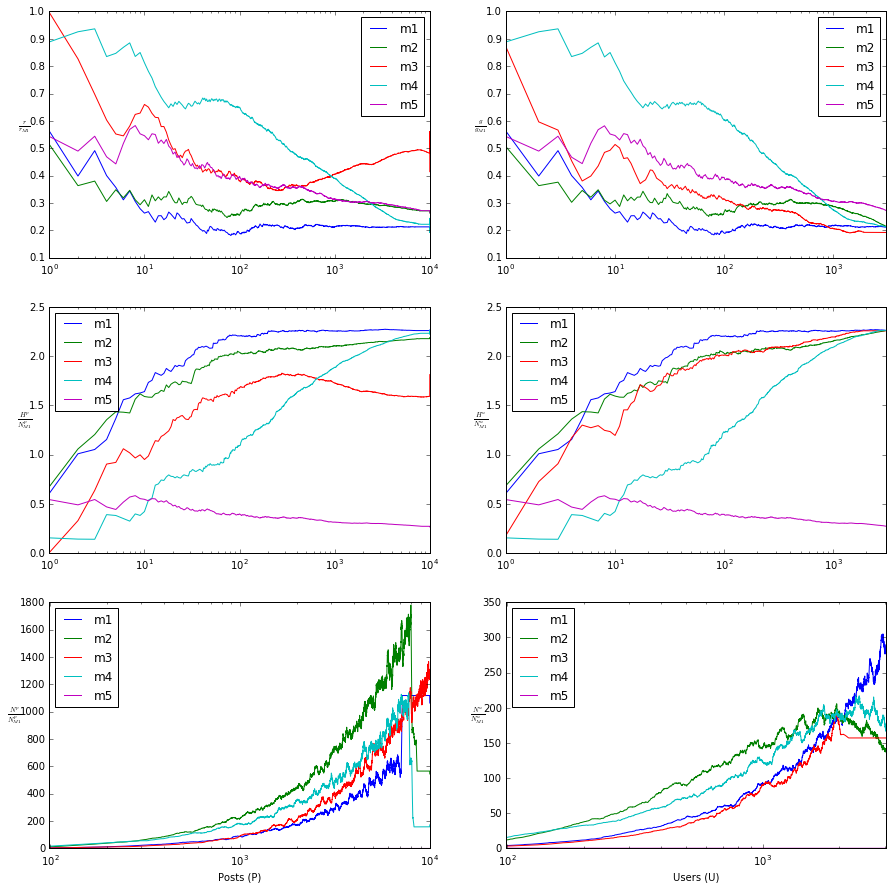

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

def ratio(n, w):
    if n == 0:
        return 0
    
    if w == 0:
        return 0
    
    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"]),
        "m5":ratio(data["m5"], data["m1"])
    }
    return pd.Series(d)

usagedominance = result_act[["usagedominance_m1","usagedominance_m2","usagedominance_m3","usagedominance_m4","usagedominance"]]
usagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# usagedominance = usagedominance.apply(rowRatio,1)

plt = usagedominance.plot(ax=axes[0,0], logx = True)
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = result_user[["userusagedominance_m1","userusagedominance_m2","userusagedominance_m3","userusagedominance_m4","usagedominance"]]
userusagedominance.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# userusagedominance = userusagedominance.apply(rowRatio,1)

plt = userusagedominance.plot(ax=axes[0,1], logx = True)
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = result_act[["usageEntorpy_m1","usageEntorpy_m2","usageEntorpy_m3","usageEntorpy_m4","usagedominance"]]
usageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# usageEntorpy = usageEntorpy.apply(rowRatio,1)

plt = usageEntorpy.plot(ax=axes[1,0], logx = True)
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = result_user[["userUsageEntorpy_m1","userUsageEntorpy_m2","userUsageEntorpy_m3","userUsageEntorpy_m4","usagedominance"]]
userUsageEntorpy.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
# userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plt = userUsageEntorpy.plot(ax=axes[1,1], logx = True)
plt.set_xlabel('')
plt.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = result_act[["ActivateionExposure_m1","ActivateionExposure_m2","ActivateionExposure_m3","ActivateionExposure_m4","usagedominance"]]
ActivateionExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm2'] = ActivateionExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm3'] = ActivateionExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm4'] = ActivateionExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
ActivateionExposure.loc[:, 'm5'] = ActivateionExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
# ActivateionExposure = ActivateionExposure.apply(rowRatio,1)

plt = ActivateionExposure.plot(ax=axes[2,0], logx = True)
plt.set_xlabel('Posts (P)')
plt.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = result_user[["UserExposure_m1","UserExposure_m2","UserExposure_m3","UserExposure_m4","usagedominance"]]
UserExposure.columns = ['m1', 'm2', 'm3', 'm4', 'm5']
UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm2'] = UserExposure.loc[:, 'm2'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm3'] = UserExposure.loc[:, 'm3'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm4'] = UserExposure.loc[:, 'm4'].rolling(window=100,center=False).mean()
UserExposure.loc[:, 'm5'] = UserExposure.loc[:, 'm5'].rolling(window=100,center=False).mean()
# UserExposure = UserExposure.apply(rowRatio,1)

plt = UserExposure.plot(ax=axes[2,1], logx = True)
plt.set_xlabel('Users (U)')
plt.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)